## Prediksi untuk Umbul Ponggok  ˖°𓇼🌊⋆🐚🫧

### Set Up

In [1]:
from PyABSA import pyabsa
from pyabsa import AspectSentimentTripletExtraction as ASTE
from pyabsa import ModelSaveOption, DeviceTypeOption
import warnings
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import torch
import os
import ast

/home/riset/.local/lib/python3.10/site-packages/spacy/cli/_util.py:23: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string
/home/riset/.local/lib/python3.10/site-packages/weasel/util/config.py:8: DeprecationWarning: Importing 'parser.split_arg_string' is deprecated, it will only be available in 'shell_completion' in Click 9.0.
  from click.parser import split_arg_string


[2025-06-10 13:26:57] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






/drive0-storage/TA_Ista/Coba/PyABSA/pyabsa/framework/checkpoint_class/checkpoint_utils.py:11: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import StrictVersion
2025-06-10 13:26:57.835485: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749536817.856911    3489 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749536817.862898    3489 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749536817.878123    3489 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

[2025-06-10 13:27:09] (2.4.1.post1) PyABSA(2.4.1.post1): If your code crashes on Colab, please use the GPU runtime. Then run "pip install pyabsa[dev] -U" and restart the kernel.
Or if it does not work, you can use v1.x versions, e.g., pip install pyabsa<2.0 -U




Try to downgrade transformers<=4.29.0.






#### Load dataset ㅤᵕ̈

In [2]:
FILE = 'integrated_datasets/aste_datasets/726.data_inference_desa_wisata/umbul_ponggok_reviews.txt'

# Baca ulasan dan bersihkan baris kosong
with open(FILE, 'r', encoding='utf-8') as f:
    examples = [line.strip() for line in f if line.strip() != '']

print(f"Jumlah ulasan: {len(examples)}")


Jumlah ulasan: 1801


#### Load Model જ⁀➴ ♡

In [3]:
triplet_extractor = ASTE.AspectSentimentTripletExtractor(
    checkpoint="AfterImprovement_f1_67.61_best",
    auto_device=DeviceTypeOption.CUDA,
)

[2025-06-10 13:31:51] (2.4.1.post1) ********** Available ASTE model checkpoints for Version:2.4.1.post1 (this version) **********
[2025-06-10 13:31:51] (2.4.1.post1) ********** Available ASTE model checkpoints for Version:2.4.1.post1 (this version) **********
[2025-06-10 13:31:51] (2.4.1.post1) Checkpoint:AfterImprovement_f1_67.61_best is not found, you can raise an issue for requesting shares of checkpoints
[2025-06-10 13:31:51] (2.4.1.post1) No checkpoint found in Model Hub for task: AfterImprovement_f1_67.61_best
[2025-06-10 13:31:51] (2.4.1.post1) Load sentiment classifier from checkpoints/AfterImprovement_f1_67.61_best
[2025-06-10 13:31:51] (2.4.1.post1) config: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.config
[2025-06-10 13:31:51] (2.4.1.post1) state_dict: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.state_dict
[2025-06-10 13:31:51] (2.4.1.post1) model: None
[2025-06-10 13:31:51] (2.4.1.post1) tokenizer: checkpoints/AfterImprovement_f1_67.61_best/emcgcn.tokenizer
[20

/home/riset/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[2025-06-10 13:32:14] (2.4.1.post1) Can not load en_core_web_sm from spacy, try to download it in order to parse syntax tree: 
python -m spacy download en_core_web_sm
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip


#### Run Predictions 🍵🍃

In [ ]:
# run predictions & collect all result dicts
all_results = []
for ex in examples:
    res = triplet_extractor.predict(ex)
    # ensure we always have a list of dicts
    batch = [res] if isinstance(res, dict) else res
    all_results.extend(batch)

[2025-06-10 13:32:29] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'wisata lokal yang cukup bisa melampiaskan hasrat foto - foto dalam air bersama ikan', 'Triplets': [], 'True Triplets': []}
[2025-06-10 13:32:29] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'wisata lokal yang cukup bisa melampiaskan hasrat foto - foto dalam air bersama ikan', 'Triplets': [], 'True Triplets': []}
[2025-06-10 13:32:29] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'enak tidak terlalu ramai pas hari kerja', 'Triplets': [], 'True Triplets': []}
[2025-06-10 13:32:29] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'enak tidak terlalu ramai pas hari kerja', 'Triplets': [], 'True Triplets': []}
[2025-06-10 13:32:29] (2.4.1.post1) Batch: 0 {'sentence_id': 0, 'sentence': 'tiap ke jogja wajib banget sih kesini . air bawahnya biru banget', 'Triplets': [{'Aspect': 'air bawahnya', 'Opinion': 'biru banget', 'Polarity': 'Positive'}], 'True Triplets': []}
[2025-06-10 13:32:29] (2.4.1.po

In [5]:
# Buat list of records untuk DataFrame
records = []
for entry in all_results:
    records.append({
        "Sentence": entry.get("sentence", ""),
        "Predicted Triplets": str(entry.get("Triplets", [])),
    })

# Konversi ke DataFrame
df = pd.DataFrame(records)

# Tampilkan beberapa baris pertama
print(df.head())

                                            Sentence  \
0  wisata lokal yang cukup bisa melampiaskan hasr...   
1            enak tidak terlalu ramai pas hari kerja   
2  tiap ke jogja wajib banget sih kesini . air ba...   
3                                         luar biasa   
4  umbul ponggok sangat keren karena merupakan de...   

                                  Predicted Triplets  
0                                                 []  
1                                                 []  
2  [{'Aspect': 'air bawahnya', 'Opinion': 'biru b...  
3                                                 []  
4  [{'Aspect': 'umbul ponggok', 'Opinion': 'sanga...  


#### Analisis Jumlah Triplet

In [6]:
# Buat kolom yang menghitung jumlah Predicted Triplets per baris
def count_predicted(x):
    # Jika berbentuk string (misal "[{'Aspect':...}...]"), parse dulu
    if isinstance(x, str):
        try:
            lst = ast.literal_eval(x)
            return len(lst)
        except (ValueError, SyntaxError):
            return 0
    # Jika sudah berbentuk list, cukup pakai len(x)
    if isinstance(x, list):
        return len(x)
    return 0

df['Count Predicted Triplets'] = df['Predicted Triplets'].apply(count_predicted)

print(f"Total triplet: {df['Count Predicted Triplets'].sum()}")


Total triplet: 3210


In [7]:
df

,Sentence,Predicted Triplets,Count Predicted Triplets
0,wisata lokal yang cukup bisa melampiaskan hasr...,[],0
1,enak tidak terlalu ramai pas hari kerja,[],0
2,tiap ke jogja wajib banget sih kesini . air ba...,"[{'Aspect': 'air bawahnya', 'Opinion': 'biru b...",1
3,luar biasa,[],0
4,umbul ponggok sangat keren karena merupakan de...,"[{'Aspect': 'umbul ponggok', 'Opinion': 'sanga...",2
...,...,...,...
1796,tempatnya mantap untuk rfresing,"[{'Aspect': 'tempatnya', 'Opinion': 'mantap', ...",1
1797,"alami tempatnya ,","[{'Aspect': 'tempatnya', 'Opinion': 'alami', '...",1
1798,tempat bagus,"[{'Aspect': 'tempat', 'Opinion': 'bagus', 'Pol...",1
1799,seharusnya dibuat larangan merokok . di sini k...,[],0


In [8]:
# Filter review dengan count = 0
df_zero = df[df['Count Predicted Triplets'] == 0]

# Tampilkan hanya kolom Sentence & Predicted Triplets
print(f"Jumlah ulasan tanpa triplet: {len(df_zero)}\n")
print(df_zero[['Sentence', 'Predicted Triplets']])


Jumlah ulasan tanpa triplet: 406

                                               Sentence Predicted Triplets
0     wisata lokal yang cukup bisa melampiaskan hasr...                 []
1               enak tidak terlalu ramai pas hari kerja                 []
3                                            luar biasa                 []
9                      keep it up , overall bintang 5++                 []
17                           adem dan enak buat nyantai                 []
...                                                 ...                ...
1784  lebaran kemaren kesini sama mama papa kakak om...                 []
1787                                                                    []
1789                                             mantap                 []
1792                         cukup satu kata . sempurna                 []
1799  seharusnya dibuat larangan merokok . di sini k...                 []

[406 rows x 2 columns]


In [9]:
# Simpan ke file Excel
output_path = 'hasil_prediksi_umbul_ponggok_absa.xlsx'
df.to_excel(output_path, index=False)

print(f"Hasil prediksi berhasil disimpan ke: {output_path}")

Hasil prediksi berhasil disimpan ke: hasil_prediksi_umbul_ponggok_absa.xlsx


### Pemecahan Hasil Prediksi

In [ ]:
import ast
import pandas as pd

# Fungsi untuk parse Predicted Triplets (string → list)
def parse_triplets(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception:
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

# Bangun list of rows untuk df_flat
rows = []
for _, row in df.iterrows():
    sentence = row['Sentence']
    triplet_list = parse_triplets(row['Predicted Triplets'])
    
    if triplet_list:
        for t in triplet_list:
            rows.append({
                'Sentence': sentence,
                'Aspect': t.get('Aspect'),
                'Opinion': t.get('Opinion'),
                'Sentiment': t.get('Polarity')  # pola key sesuai dict prediksi
            })
    else:
        # Jika tidak ada triplet, tetap masukkan sekali dengan None
        rows.append({
            'Sentence': sentence,
            'Aspect': None,
            'Opinion': None,
            'Sentiment': None
        })

# Buat DataFrame
df_flat = pd.DataFrame(rows)

# Cek hasil
print(df_flat.head())
print(f"Total baris di df_flat: {len(df_flat)}")


                                            Sentence         Aspect  \
0  wisata lokal yang cukup bisa melampiaskan hasr...           None   
1            enak tidak terlalu ramai pas hari kerja           None   
2  tiap ke jogja wajib banget sih kesini . air ba...   air bawahnya   
3                                         luar biasa           None   
4  umbul ponggok sangat keren karena merupakan de...  umbul ponggok   

        Opinion Sentiment  
0          None      None  
1          None      None  
2   biru banget  Positive  
3          None      None  
4  sangat keren  Positive  
Total baris di df_flat: 3616


#### Persebaran Sentimen

In [71]:
# skip klo masih fresh habis nge-predict
excel_path = "hasil_prediksi_umbul_ponggok_absa.xlsx"
df_flat = pd.read_excel(excel_path)

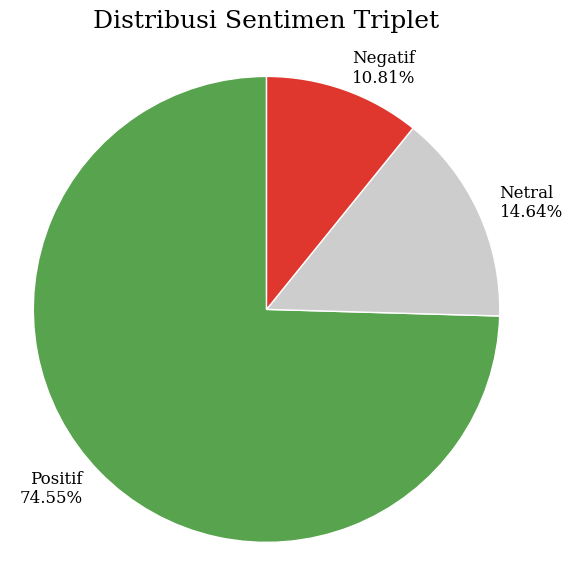

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# df = pd.read_excel('hasil_prediksi_kampung_blekok.xlsx')

# Fungsi parsing kolom Predicted Triplets
def parse_triplets(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    elif isinstance(x, list):
        return x
    else:
        return []

# Flatten list triplets ke DataFrame df_flat
rows = []
for _, row in df.iterrows():
    triplets = parse_triplets(row['Predicted Triplets'])
    if triplets:
        for t in triplets:
            rows.append(t)  # t = {'Aspect','Opinion','Polarity'}
    else:
        rows.append({'Aspect': None, 'Opinion': None, 'Polarity': None})
df_flat = pd.DataFrame(rows)

# Ubah ke label Bahasa Indonesia
mapping = {'Positive': 'Positif', 'Negative': 'Negatif', 'Neutral': 'Netral'}
df_flat['Sentiment_ID'] = df_flat['Polarity'].map(mapping).fillna(df_flat['Polarity'])

# Hitung distribusi dan persentase
counts = df_flat['Sentiment_ID'].value_counts()
labels = counts.index.tolist() 
sizes  = counts.values
total  = sizes.sum()
percentages = [s/total*100 for s in sizes]

# Buat label 2-baris: sentimen di atas, persen di bawah
label_strs = [
    f"{lbl}\n{pct:.2f}%"
    for lbl, pct in zip(labels, percentages)
]

color_map = {'Positif':'#58A34E','Negatif':'#DF362D','Netral':'#CDCDCD'}
colors = [color_map[lbl] for lbl in labels]

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=label_strs,
    colors=colors,
    startangle=90,
    wedgeprops={'edgecolor':'white','linewidth':1},
    textprops={'fontsize':12}
)
plt.axis('equal')
plt.title("Distribusi Sentimen Triplet", pad=20)
plt.tight_layout()
plt.savefig('persebaran_sentimen_umbul_ponggok_absa.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
# Hitung distribusi
counts = df_flat['Sentiment_ID'].value_counts()

# Cetak jumlah untuk masing-masing sentimen
print("Positif :", counts.get('Positif', 0))
print("Negatif :", counts.get('Negatif', 0))
print("Netral :", counts.get('Netral', 0))

Positif : 2393
Negatif : 347
Netral : 470


#### Hapus Nilai NaN

In [14]:
df_flat

,Aspect,Opinion,Polarity,Sentiment_ID
0,None,None,None,None
1,None,None,None,None
2,air bawahnya,biru banget,Positive,Positif
3,None,None,None,None
4,umbul ponggok,sangat keren,Positive,Positif
...,...,...,...,...
3611,harga,paling mantap,Positive,Positif
3612,harga,tidak ada yang nembak,Negative,Negatif
3613,mandi,sangat segar,Positive,Positif
3614,ikan ikan,banyak,Positive,Positif


In [15]:
# Drop semua baris yang punya NaN di _semua_ kolom
df_flat = df_flat.dropna()

In [16]:
df_flat

,Aspect,Opinion,Polarity,Sentiment_ID
2,air bawahnya,biru banget,Positive,Positif
4,umbul ponggok,sangat keren,Positive,Positif
5,umbul ponggok,dikelola masyarakat,Neutral,Netral
6,tempat,sangat bagus,Positive,Positif
7,kolam,bersih,Positive,Positif
...,...,...,...,...
3611,harga,paling mantap,Positive,Positif
3612,harga,tidak ada yang nembak,Negative,Negatif
3613,mandi,sangat segar,Positive,Positif
3614,ikan ikan,banyak,Positive,Positif


## Analisis Positif ⋆｡‧˚ʚ🍓ɞ˚‧｡⋆

In [69]:
# skip kalo masih fresshhhhhhhhhh
excel_path = "hasil_separate_prediction_kampung_blekok.xlsx"
df_flat_bfr = pd.read_excel(excel_path)

#### Persebaran Aspek Positif (Before)

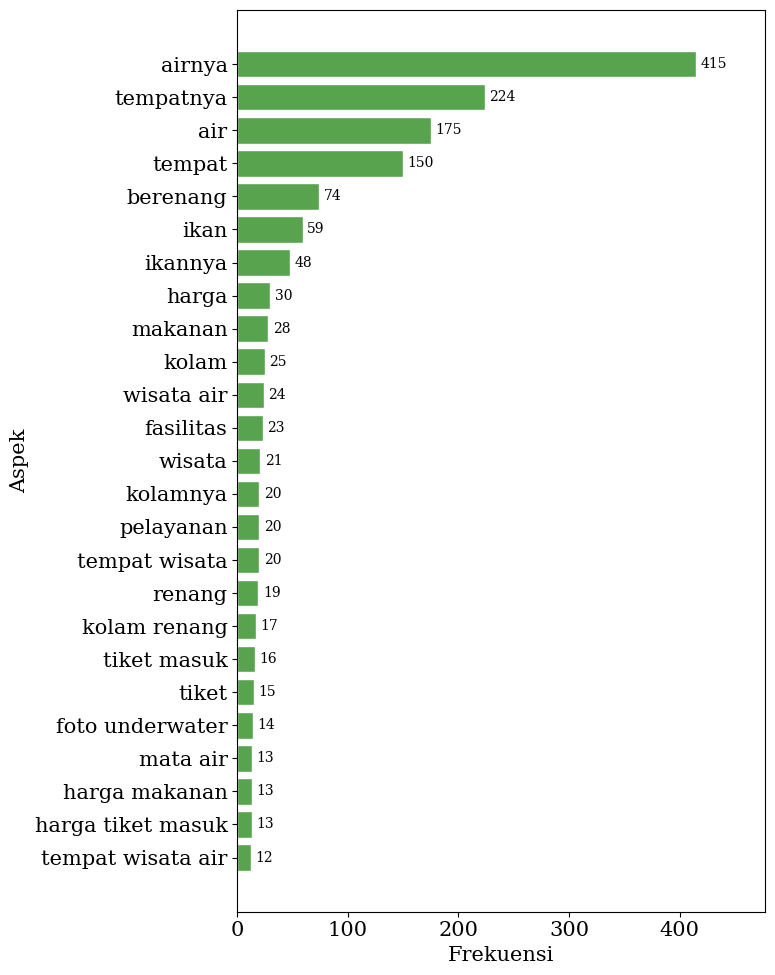

In [18]:
import matplotlib.pyplot as plt

# 1. Filter hanya untuk polarity “Positive”
df_pos_bfr = df_flat[df_flat['Polarity'] == 'Positive']

# 2. Hitung frekuensi aspek dan ambil top 25
aspect_counts = df_pos_bfr['Aspect'].value_counts().head(25)

# 3. Urutkan ascending supaya bar terbesar di atas
aspect_counts = aspect_counts.sort_values()

# 4. Plot
plt.figure(figsize=(8, 10))
bars = plt.barh(
    aspect_counts.index,
    aspect_counts.values,
    color='#58A34E',
    edgecolor='white',
    height=0.8
)

# 5. Annotasi angka di ujung batang
for bar in bars:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        w + max(aspect_counts.values) * 0.01,  # sedikit ke kanan
        y,
        str(int(w)),
        va='center',
        fontsize=10
    )

plt.xlabel('Frekuensi')
plt.xlim(0, aspect_counts.values.max() * 1.15)
plt.ylabel('Aspek')
# plt.title('Top 25 Aspek Terpopuler (Only Positive) di Kampung Blekok')
plt.tight_layout()
plt.savefig('top25_aspek_positive_umbul_ponggok-before.png', dpi=300, bbox_inches='tight')
plt.show()


#### Hapus Akhiran "-nya" yang terdapat pada Aspek

In [19]:
def strip_nya(aspect: str) -> str:
    # pastikan tipe string
    if not isinstance(aspect, str):
        return aspect
    # hapus “-nya” dulu, baru “nya”
    if aspect.endswith('-nya'):
        return aspect[:-4]       # buang 4 karakter (“-nya”)
    if aspect.endswith('nya'):
        return aspect[:-3]       # buang 3 karakter (“nya”)
    return aspect

# Terapkan ke kolom Aspect
df_flat['Aspect'] = df_flat['Aspect'].apply(strip_nya)


/tmp/ipykernel_3489/3773486667.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flat['Aspect'] = df_flat['Aspect'].apply(strip_nya)


### Pemberhentian Sementara Untuk Normalisasi Aspek 𓆉 ⋆.˚ 𓆝⋆.˚

In [20]:
df_flat.to_excel('hasil_separate_prediction_kampung_blekok.xlsx', index=False)

#### Persebaran Aspek Positif (After)

In [21]:
# Load file yang aspek udah diedit
excel_path = "edited_hasil_separate_prediction_kampung_blekok.xlsx"
df_flat = pd.read_excel(excel_path)

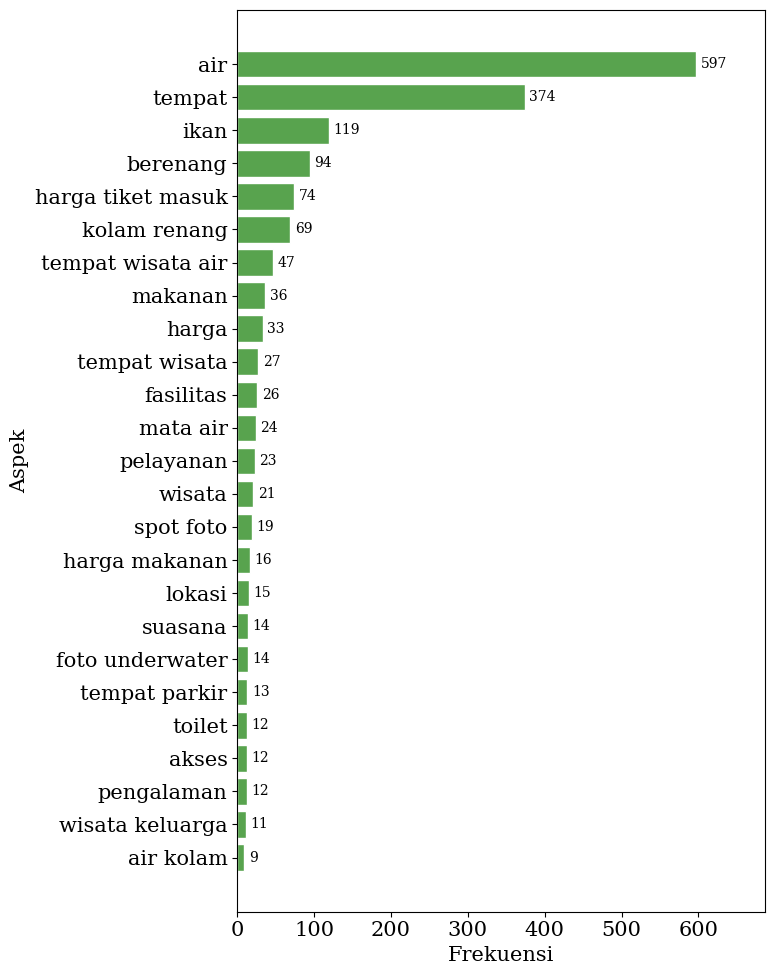

In [23]:
import matplotlib.pyplot as pl

# Filter hanya untuk polarity “Positive”
df_pos = df_flat[df_flat['Polarity'] == 'Positive']

# Hitung frekuensi aspek dan ambil top 25
aspect_counts = df_pos['Aspect'].value_counts().head(25)

# Urutkan ascending supaya bar terbesar di atas
aspect_counts = aspect_counts.sort_values()

# Plot
plt.figure(figsize=(8, 10))
bars = plt.barh(
    aspect_counts.index,
    aspect_counts.values,
    color='#58A34E',
    edgecolor='white',
    height=0.8
)

# Annotasi angka di ujung batang
for bar in bars:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        w + max(aspect_counts.values) * 0.01,  # sedikit ke kanan
        y,
        str(int(w)),
        va='center',
        fontsize=10
    )

plt.xlabel('Frekuensi')
plt.xlim(0, aspect_counts.values.max() * 1.15)
plt.ylabel('Aspek')
# plt.title('Top 25 Aspek Terpopuler (Only Positive) di Kampung Blekok')
plt.tight_layout()
plt.savefig('top25_aspek_positive_umbul_ponggok-after.png', dpi=300, bbox_inches='tight')
plt.show()


#### WordCloud Opini Positif

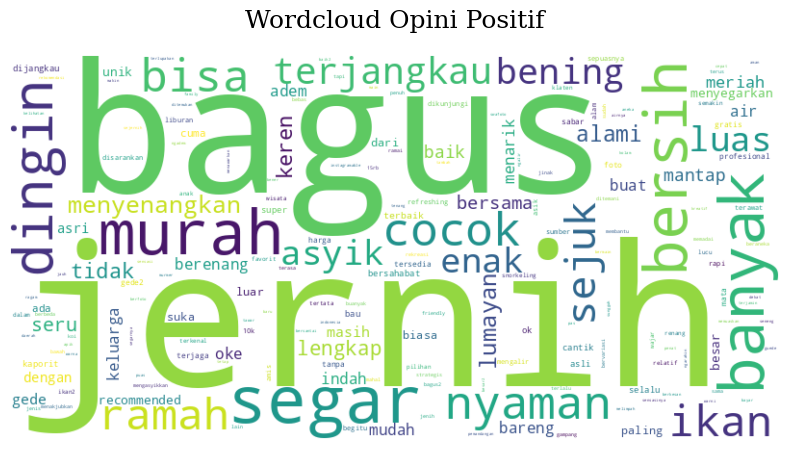

In [39]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. Ambil semua opini positif dan gabungkan jadi satu string
pos_list = df_flat[df_flat['Sentiment_ID'] == 'Positif']['Opinion'].dropna().tolist()
text = ' '.join(pos_list)

# Tambahkan kata penguat ke stopwords
custom_stopwords = STOPWORDS.union({'sangat', 'banget', 'sekali', 'lebih', 'juga', 'yang', 'untuk', 'dan', 
                                    'cukup', 'hanya', 'di', 'jadi', 'hanya'})

# 2. Generate wordcloud
wc = WordCloud(
    stopwords=custom_stopwords,
    width=800,
    height=400,
    background_color='white',
    collocations=False  # hindari penggabungan kata kunci yang tidak diinginkan
).generate(text)

# 3. Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Opini Positif', pad=20)
plt.savefig('wordcloud_opini_positive_umbul_ponggok_absa.png', dpi=300, bbox_inches='tight')
plt.show()


## Analisis Negatif ❤️‍🩹 ─ ...

#### Top 25 Aspek Negatif (sudah normalisasi)

In [25]:
stop_aspects = ['ke', 'di', 'yang', 'untuk', 'dari'] 
df_flat = df_flat[~df_flat['Aspect'].isin(stop_aspects)]


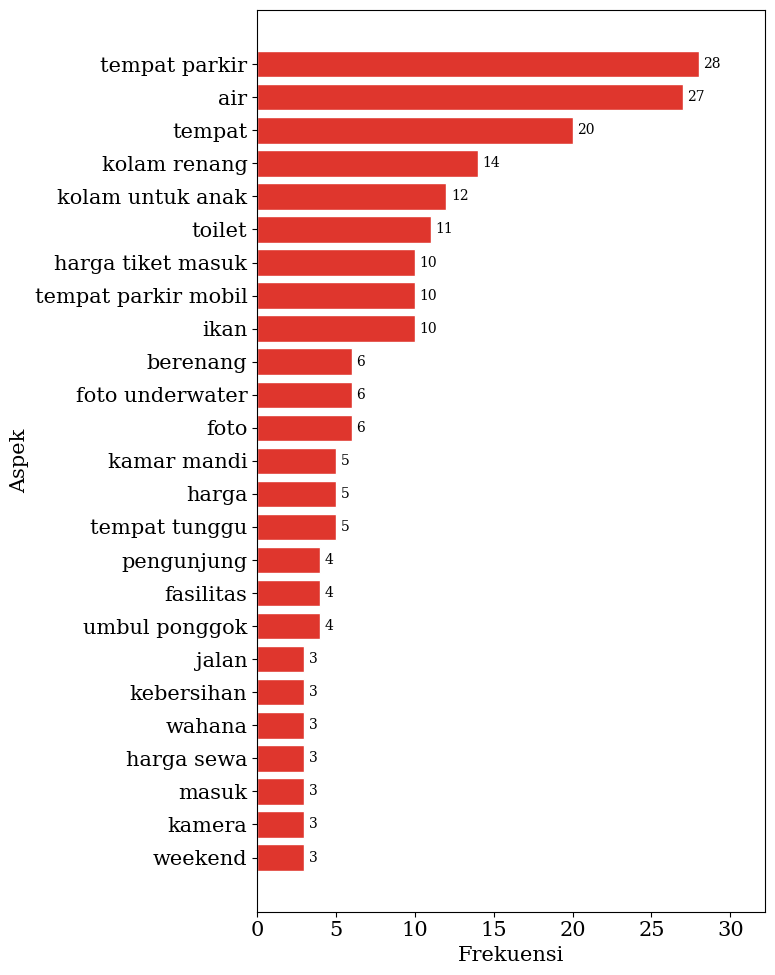

In [26]:
import matplotlib.pyplot as pl

# Filter hanya untuk polarity “Positive”
df_neg = df_flat[df_flat['Polarity'] == 'Negative']

# Hitung frekuensi aspek dan ambil top 25
aspect_counts = df_neg['Aspect'].value_counts().head(25)

# Urutkan ascending supaya bar terbesar di atas
aspect_counts = aspect_counts.sort_values()

# Plot
plt.figure(figsize=(8, 10))
bars = plt.barh(
    aspect_counts.index,
    aspect_counts.values,
    color='#DF362D',
    edgecolor='white',
    height=0.8
)

# Annotasi angka di ujung batang
for bar in bars:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        w + max(aspect_counts.values) * 0.01,  # sedikit ke kanan
        y,
        str(int(w)),
        va='center',
        fontsize=10
    )

plt.xlabel('Frekuensi')
plt.xlim(0, aspect_counts.values.max() * 1.15)
plt.ylabel('Aspek')
# plt.title('Top 25 Aspek Terpopuler (Only Neg) di Kampung Blekok')
plt.tight_layout()
plt.savefig('top25_aspek_negative_umbul_ponggok_absa.png', dpi=300, bbox_inches='tight')
plt.show()


#### Wordcloud Opini Negatif

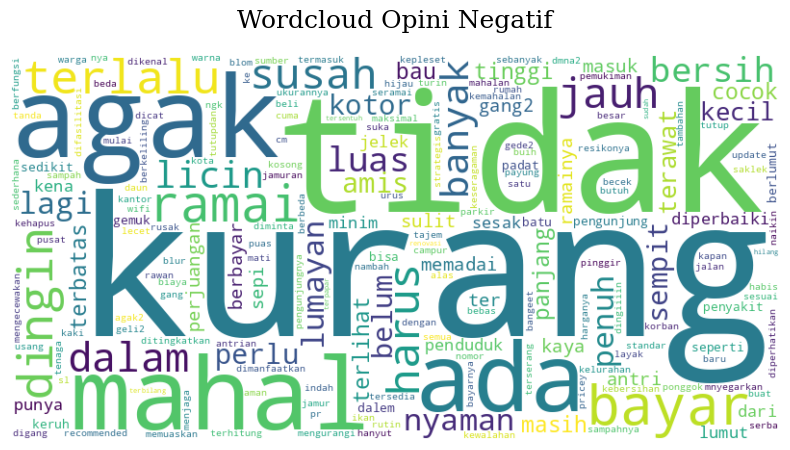

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. Ambil semua opini netral dan gabungkan jadi satu string
neg_list = df_flat[df_flat['Polarity'] == 'Negative']['Opinion'].dropna().tolist()
text = ' '.join(neg_list)

# Tambahkan kata penguat ke stopwords
custom_stopwords = STOPWORDS.union({'sangat', 'banget', 'sekali', 'lebih', 'juga', 'yang', 'untuk', 'dan', 
                                    'cukup', 'hanya', 'di', 'jadi', 'hanya'})

# 2. Generate wordcloud
wc = WordCloud(
    stopwords=custom_stopwords,
    width=800,
    height=400,
    background_color='white',
    collocations=False  # hindari penggabungan kata kunci yang tidak diinginkan
).generate(text)

# 3. Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Opini Negatif', pad=20)
plt.savefig('wordcloud_opini_negative_umbul_ponggok_absa.png', dpi=300, bbox_inches='tight')
plt.show()


## Analisis Netral 🐰ྀི

#### Top 25 Aspek Netral (sudah normalisasi)

In [28]:
stop_aspects = ['ke', 'di', 'yang', 'untuk', 'dari'] 
df_flat = df_flat[~df_flat['Aspect'].isin(stop_aspects)]


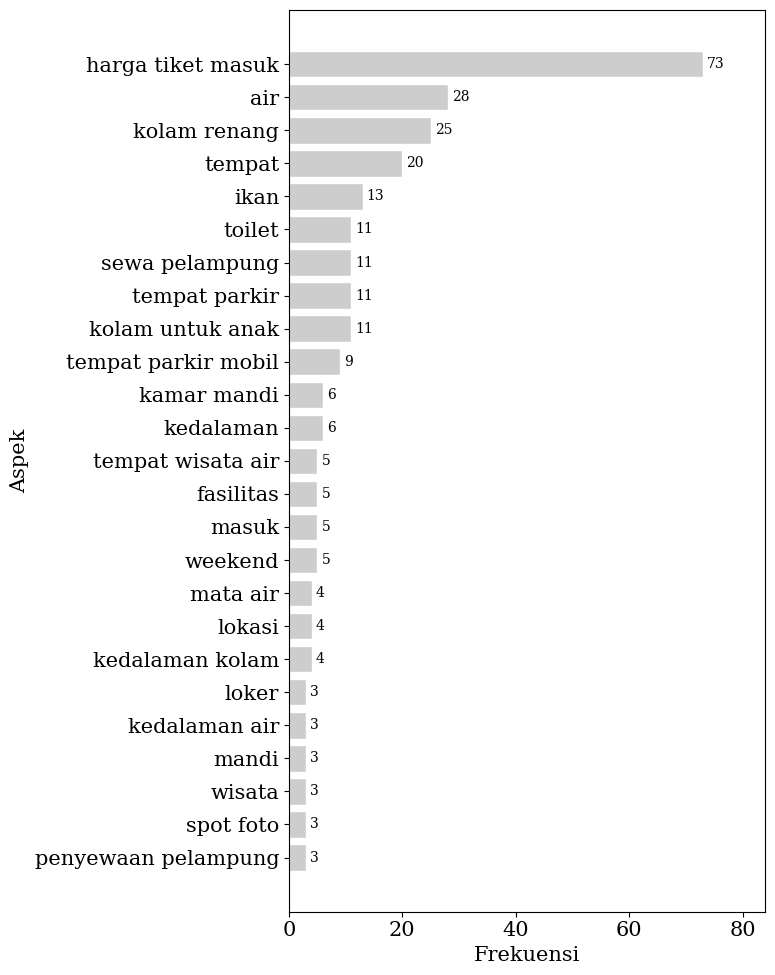

In [29]:
import matplotlib.pyplot as pl

# Filter hanya untuk polarity “Positive”
df_neu = df_flat[df_flat['Polarity'] == 'Neutral']

# Hitung frekuensi aspek dan ambil top 25
aspect_counts = df_neu['Aspect'].value_counts().head(25)

# Urutkan ascending supaya bar terbesar di atas
aspect_counts = aspect_counts.sort_values()

# Plot
plt.figure(figsize=(8, 10))
bars = plt.barh(
    aspect_counts.index,
    aspect_counts.values,
    color='#CDCDCD',
    edgecolor='white',
    height=0.8
)

# Annotasi angka di ujung batang
for bar in bars:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(
        w + max(aspect_counts.values) * 0.01,  # sedikit ke kanan
        y,
        str(int(w)),
        va='center',
        fontsize=10
    )

plt.xlabel('Frekuensi')
plt.xlim(0, aspect_counts.values.max() * 1.15)
plt.ylabel('Aspek')
# plt.title('Top 25 Aspek Terpopuler (Only Neu) di Kampung Blekok')
plt.tight_layout()
plt.savefig('top25_aspek_neutral_umbul_ponggok_absa.png', dpi=300, bbox_inches='tight')
plt.show()


#### Wordcloud Opini Netral

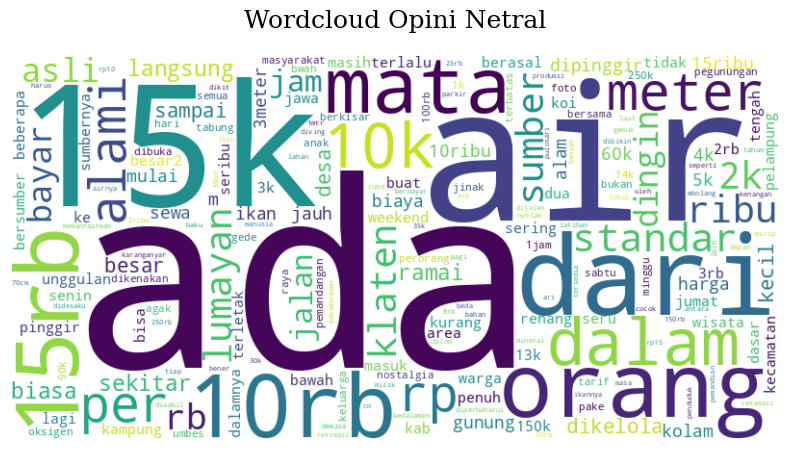

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1. Ambil semua opini netral dan gabungkan jadi satu string
neu_list = df_flat[df_flat['Polarity'] == 'Neutral']['Opinion'].dropna().tolist()
text = ' '.join(neu_list)

# Tambahkan kata penguat ke stopwords
custom_stopwords = STOPWORDS.union({'sangat', 'banget', 'sekali', 'lebih', 'juga', 'yang', 'untuk', 'dan', 
                                    'cukup', 'hanya', 'di', 'jadi', 'hanya'})

# 2. Generate wordcloud
wc = WordCloud(
    stopwords=custom_stopwords,
    width=800,
    height=400,
    background_color='white',
    collocations=False  # hindari penggabungan kata kunci yang tidak diinginkan
).generate(text)

# 3. Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Opini Netral', pad=20)
plt.savefig('wordcloud_opini_neutral_umbul_ponggok_absa.png', dpi=300, bbox_inches='tight')
plt.show()


## ⭐️ Top Pasangan Aspek-Opini-Sentimen

In [37]:
# Lakukan replace hanya pada kata utuh “seger”
df_flat['Opinion'] = df_flat['Opinion'].str.replace(
    r'\bseger\b',
    'segar',
    regex=True,
    # na_rep=None  # atau biarkan default untuk menjaga NaN tetap NaN
)

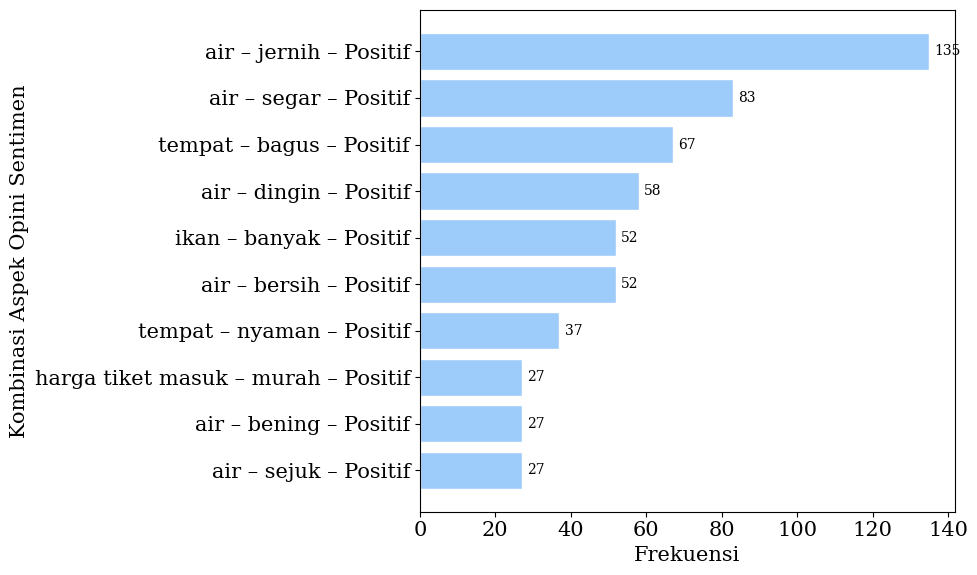

In [38]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# 1. Ambil seluruh data
all_df = df_flat.copy()

# 2. Hitung frekuensi pasangan Aspect–Opinion–Polarity
pair_counts = (
    all_df
    .groupby(['Aspect', 'Opinion', 'Sentiment_ID'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(10)
)

# 3. Plot horizontal bar chart (semua warna biru)
plt.figure(figsize=(10, 6))

# Label sekarang mencakup sentimen juga
labels = pair_counts.apply(
    lambda r: f"{r['Aspect']} – {r['Opinion']} – {r['Sentiment_ID']}", axis=1
)[::-1]
counts = pair_counts['count'][::-1]

bars = plt.barh(labels, counts, color='#9ECCFA', edgecolor='white')

# 4. Tambahkan label angka
for bar in bars:
    w = bar.get_width()
    plt.text(w + counts.max()*0.01, bar.get_y() + bar.get_height()/2,
             str(int(w)), va='center', fontsize=10)

plt.xlabel('Frekuensi')
plt.ylabel('Kombinasi Aspek Opini Sentimen')
# plt.title('Top 10 Pasangan Aspect–Opinion–Sentimen')
plt.tight_layout()
plt.savefig('top10_aos_all_sentiment_umbul_ponggok_absa.png', dpi=300, bbox_inches='tight')
plt.show()
